# Initialisation of project

### load libraries
### load csv data into arrays

In [2]:
%matplotlib inline
# notebook
import matplotlib.pylab as pylab
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
from sklearn.decomposition import PCA

#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [4]:
import csv 
import sys #used for passing in the argument

data = []
with open("./eigg.csv", 'r') as f:  #opens PW file
    reader = csv.reader(f)
    data = list(list(rec) for rec in csv.reader(f, delimiter=',')) #reads csv into a list of lists

print(len(data))
print(len(data[0]))
print(data[0])
print(all([len(i) == len(data[0]) for i in data]))

37389
53
['NBN Atlas record ID', 'Occurrence ID', 'Licence', 'Rightsholder', 'Scientific name', 'Common name', 'Species ID (TVK)', 'Taxon Rank', 'Occurrence status', 'Start date', 'Start date day', 'Start date month', 'Start date year', 'End date', 'End date day', 'End date month', 'End date year', 'Locality', 'OSGR', 'Latitude (WGS84)', 'Longitude (WGS84)', 'Coordinate uncertainty (m)', 'Verbatim depth', 'Recorder', 'Determiner', 'Individual count', 'Abundance', 'Abundance scale', 'Organism scope', 'Organism remarks', 'Sex', 'Life stage', 'Occurrence remarks', 'Identification verification status', 'Basis of record', 'Survey key', 'Dataset name', 'Dataset ID', 'Data provider', 'Data provider ID', 'Institution code', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'OSGR 100km', 'OSGR 10km', 'OSGR 2km', 'OSGR 1km', 'Country', 'State/Province']
True


In [6]:
#testing locations
#https://her.highland.gov.uk/Monument/MHG4250

import json

def residentialEntry():
    
    residentials = {}
        
    residentials['56.9192255,-6.1462968'] = "tourist guest house"
    residentials['56.9199282,-6.1466916'] = "tourist info"
    residentials['56.9192255,-6.1462968'] = "lageorona site"
    residentials['56.8709333,-6.1213667'] = "lighthouse"
    residentials['56.8781465,-6.1326085'] = "buyout monument"
    residentials['56.8772523,-6.1305778'] = 'lamp'
    
    residentials['56.8781465,-6.1326085'] = "historic memorial"
    residentials['56.9003152,-6.1404042'] = "historic monument"
    residentials['56.9199238,-6.1467235'] = "historic memorial"
    
    residentials['56.8797535,-6.1267920'] = "ferry_terminal"
    residentials['56.9190886,-6.1463398'] = "restaurant"
    residentials['56.8772523,-6.1305778'] = "post-box"
    residentials['56.8772214,-6.1306635'] = "postoffice"
    residentials['56.9218827,-6.1464040'] = "cleadale"
    residentials['56.8888173,-6.1227537'] = "kildonnan"
    residentials['56.8770948,-6.1389645'] = "Galmisdale"
    residentials['56.9285566,-6.1433419'] = "Howlin"
    residentials['56.8794302,-6.1776533'] = "Grulin"
    residentials['56.9190886,-6.1463398'] = 'Lageorna'
    #residentials['56.9187381,-6.1651365'] = 'Laig Bay'
    
    residentials['56.9199238,-6.1467235'] = 'Eigg War Memorial'
    residentials['56.9218827,-6.1464040'] = '<village>'
    residentials['56.8888173,-6.1227537'] = '<locality>'
    #residentials['56.8770948,-6.1389645'] = '<village>'
    residentials['56.9285566,-6.1433419'] = '<village>'
    
    residentials['56.8794302,-6.1776533'] = '<locality>'
    #residentials['56.8643159,-6.2062335'] = '<locality>'
    #residentials['56.9399878,-6.2222024'] = '<locality>'
    
    ####################------------
    
    residentials['56.8798083,-6.1462677'] = "Town Hall"
    residentials['56.8932164,-6.1448756'] = "Church"
    residentials['56.9025486,-6.1389638'] = "Primary School"
    residentials['56.9031345,-6.1392428'] = "Heritage Trust"
    residentials['56.917479,-6.1453462'] = "Roman Church"
    residentials['56.8802725,-6.1417391'] = "Eco Center"
    residentials['56.901693, -6.141992'] = "Old Museum"
    
    residentials['56.9018832,-6.1449375'] ="1 Cuagach"
    residentials['56.907887,-6.1960333'] ="2 Cuagach"
    residentials['56.9018832,-6.1449375'] ="2 New House, Cleadale"
    residentials['56.9018832,-6.1449375'] ="3 Cuagach"
    residentials['56.9018832,-6.1449375'] ="3 New House, Cleadale"
    residentials['56.9018832,-6.1449375'] ="4 Cleadale"
    residentials['56.9018832,-6.1449375'] ="4 New House, Cleadale"
    residentials['56.9018832,-6.1449375'] ="5 Cleadale"
    residentials['56.9018832,-6.1449375'] ="6 Cleadale"
    residentials['56.9018832,-6.1449375'] ="6 New House, Cleadale"
    #residentials['56.9222109,-6.1471357'] ="8 Cleadale" # NA
    #residentials['56.9222109,-6.1471357'] ="13 Cleadale" #Eigg Organics
    residentials['56.901695,-6.1419985'] ="A Nead" #knitwear - business?
    residentials[''] ="Barrahead View" # :(
    residentials[''] ="Bayview Cleadale"  # :(
    residentials['56.901837, -6.120534'] ="Brae Cottage" # estimate
    residentials[''] ="Cnoc Mor" # :(
    residentials[''] ="Craigard" # :(
    residentials[''] ="Department of Social Services, Tigh Carraigh" #at heritage trust
    residentials['56.8804647,-6.1417635'] ="Earth Connections Sustainability Centre"
    residentials['56.9031345,-6.1392428'] ="Eigg Electric Ltd, An Laimhrig"
    residentials['56.902125, -6.142966'] ="Foresters Cottage"
    residentials[''] ="Galmisdale Cottage" # :(
    residentials['56.878903, -6.146895'] ="Galmisdale House"
    residentials[''] ="Grianan" # :(
    residentials[''] ="Hill Cottage" # :(
    residentials['56.9272042,-6.1444563'] ="Howlin Cottage"
    residentials['56.928432, -6.144725'] ="Howlin House"
    residentials['56.888946,-6.1250917'] ="Kildonan House"
    residentials['56.9194645,-6.1463873'] ="Lageorna"
    residentials['56.911010, -6.162750'] ="Laig Bay"
    residentials['56.911597, -6.161675'] ="Laig Farm"
    #############
    residentials[''] ="Maranatha" #7 Cleadale
    residentials['56.877696, -6.130619'] ="Millers Cottage"
    residentials[''] ="New House, Cuagach"
    residentials['56.8778748,-6.1306834'] ="Pier Cottage"
    residentials['56.9031345,-6.1392428'] ="Sandamhor Bothy"
    residentials['56.9031345,-6.1392428'] ="Sandamhor Farm"
    residentials['56.9243404,-6.1522132'] ="Seaview"
    residentials['56.918268, -6.154348'] ="Shore Cottage"
    residentials['56.877586,-6.1370604'] ="Smithy"
    residentials['56.877586,-6.1370604'] ="The Bothy Cuagach"
    residentials['56.917893, -6.147771'] ="The Crows Nest" # :(
    residentials['56.890261,-6.1341621'] ="The Glebe"
    residentials['56.889429, -6.135299'] ="The Manse"
    residentials[''] ="The Mill"
    residentials['56.8772199,-6.132769'] ="The Pier Tea Shop"
    #estimated cabins- first valid only extra 
    #56.923335, -6.151425
    #56.921166, -6.149596
    #56.920156, -6.145363
    #residentials['56.9222109,-6.1471357'] = "Tigh Eilidh"
    residentials['56.921928, -6.146227'] ="Tigh A Bhlar"
    residentials['56.921726, -6.145699'] ="Tigh An Sithean"
    residentials['56.921563, -6.145661'] ="Tigh An Tobar, Cleadale"
    residentials['56.921408, -6.145718'] ="Tigh Sandabheag"
    residentials['56.9249419,-6.1493057'] ="Top House, Cleadale"
    
    residentials['56.8772523, -6.1305778'] = "OK"
    
    return residentials
    
def industryEntry():
    #http://isleofeigg.org/shops-on-eigg/
    
    industries = {}
    industries['56.901884,-6.1449376'] = "SPAR"
    industries['56.8773155,-6.1319773'] = "Adventures"
    industries['56.8771742,-6.1328471'] = "Craftshop"
    industries['56.8772228,-6.132769'] = "Galmisdale Bay"
    industries['56.9195159,-6.1484787'] = "Lageorna" # + guest house
    industries['56.9222109,-6.1471357'] = "Eigg Organics"
    industries['56.8772214,-6.1306635'] = "Post Office" # + isle of eigg shop
    industries['56.8772607,-6.1308244'] = "Bike Shop"
    industries['56.9199282,6.1466916'] = "Info Board"
    #individuals
    industries['56.9016979,-6.1441872'] = "AnNead Hand Knitwear"
    
    #renewables
    #http://www.communitypower.scot/case-studies/projects/eigg-electric/
    #https://www.bbc.com/future/article/20170329-the-extraordinary-electricity-of-the-scottish-island-of-eigg

    return industries

def electricGrid():
    electrics = {}
    electrics['56.909761,-6.163664'] = "Laig Hydro"
    electrics['56.888556,-6.122431'] = "Kildonan Hydro"
    electrics['56.878528,-6.132869'] = "Pier Hydro"
    
    electrics['56.876541,-6.145949'] = "Turbines"
    
    electrics['56.887181,-6.138750'] = "PV Panels"    
    electrics['56.888083,-6.137484'] = "Generator"
    
    ####################################################
    
    electrics['56.8769979,-6.1536679'] = "OK" #turbines
    electrics['56.8765690,-6.1531231'] = "OK"
    electrics['56.8767902,-6.1533662'] = "OK"
    electrics['56.8764323,-6.1527857'] = "OK"
    
    electrics['56.8769979,-6.1536679'] = "OK" #generators
    electrics['56.8765690,-6.1531231'] = "OK"
    electrics['56.8767902,-6.1533662'] = "OK"
    electrics['56.8764323,-6.1527857'] = "OK"
    
    return electrics
    

res = {}
x = (Counter([x[19] + "," + x[20] for x in data[1:]]))

res["natural"] = x
res["industry"] = industryEntry()
res["residential"] = residentialEntry()
res["electric"] = electricGrid()

sanity = list(industryEntry().keys()) + list(residentialEntry().keys())
with open('resultOther.json', 'w') as fp:
    json.dump(res, fp)


# Number of records per year

In [1]:
byYear = sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])
byYear = list(filter(lambda x: x[0] != '', byYear))

fig = plt.figure()
plt.plot([x[0] for x in byYear], [x[1] for x in byYear])

x = [x[0] for x in byYear]
y = [x[1] for x in byYear]
plt.plot(x, y)
plt.xticks(x, rotation='vertical')
plt.margins(0.01)
plt.subplots_adjust(bottom=0.15)
plt.show()

NameError: name 'Counter' is not defined

# Samples by decade

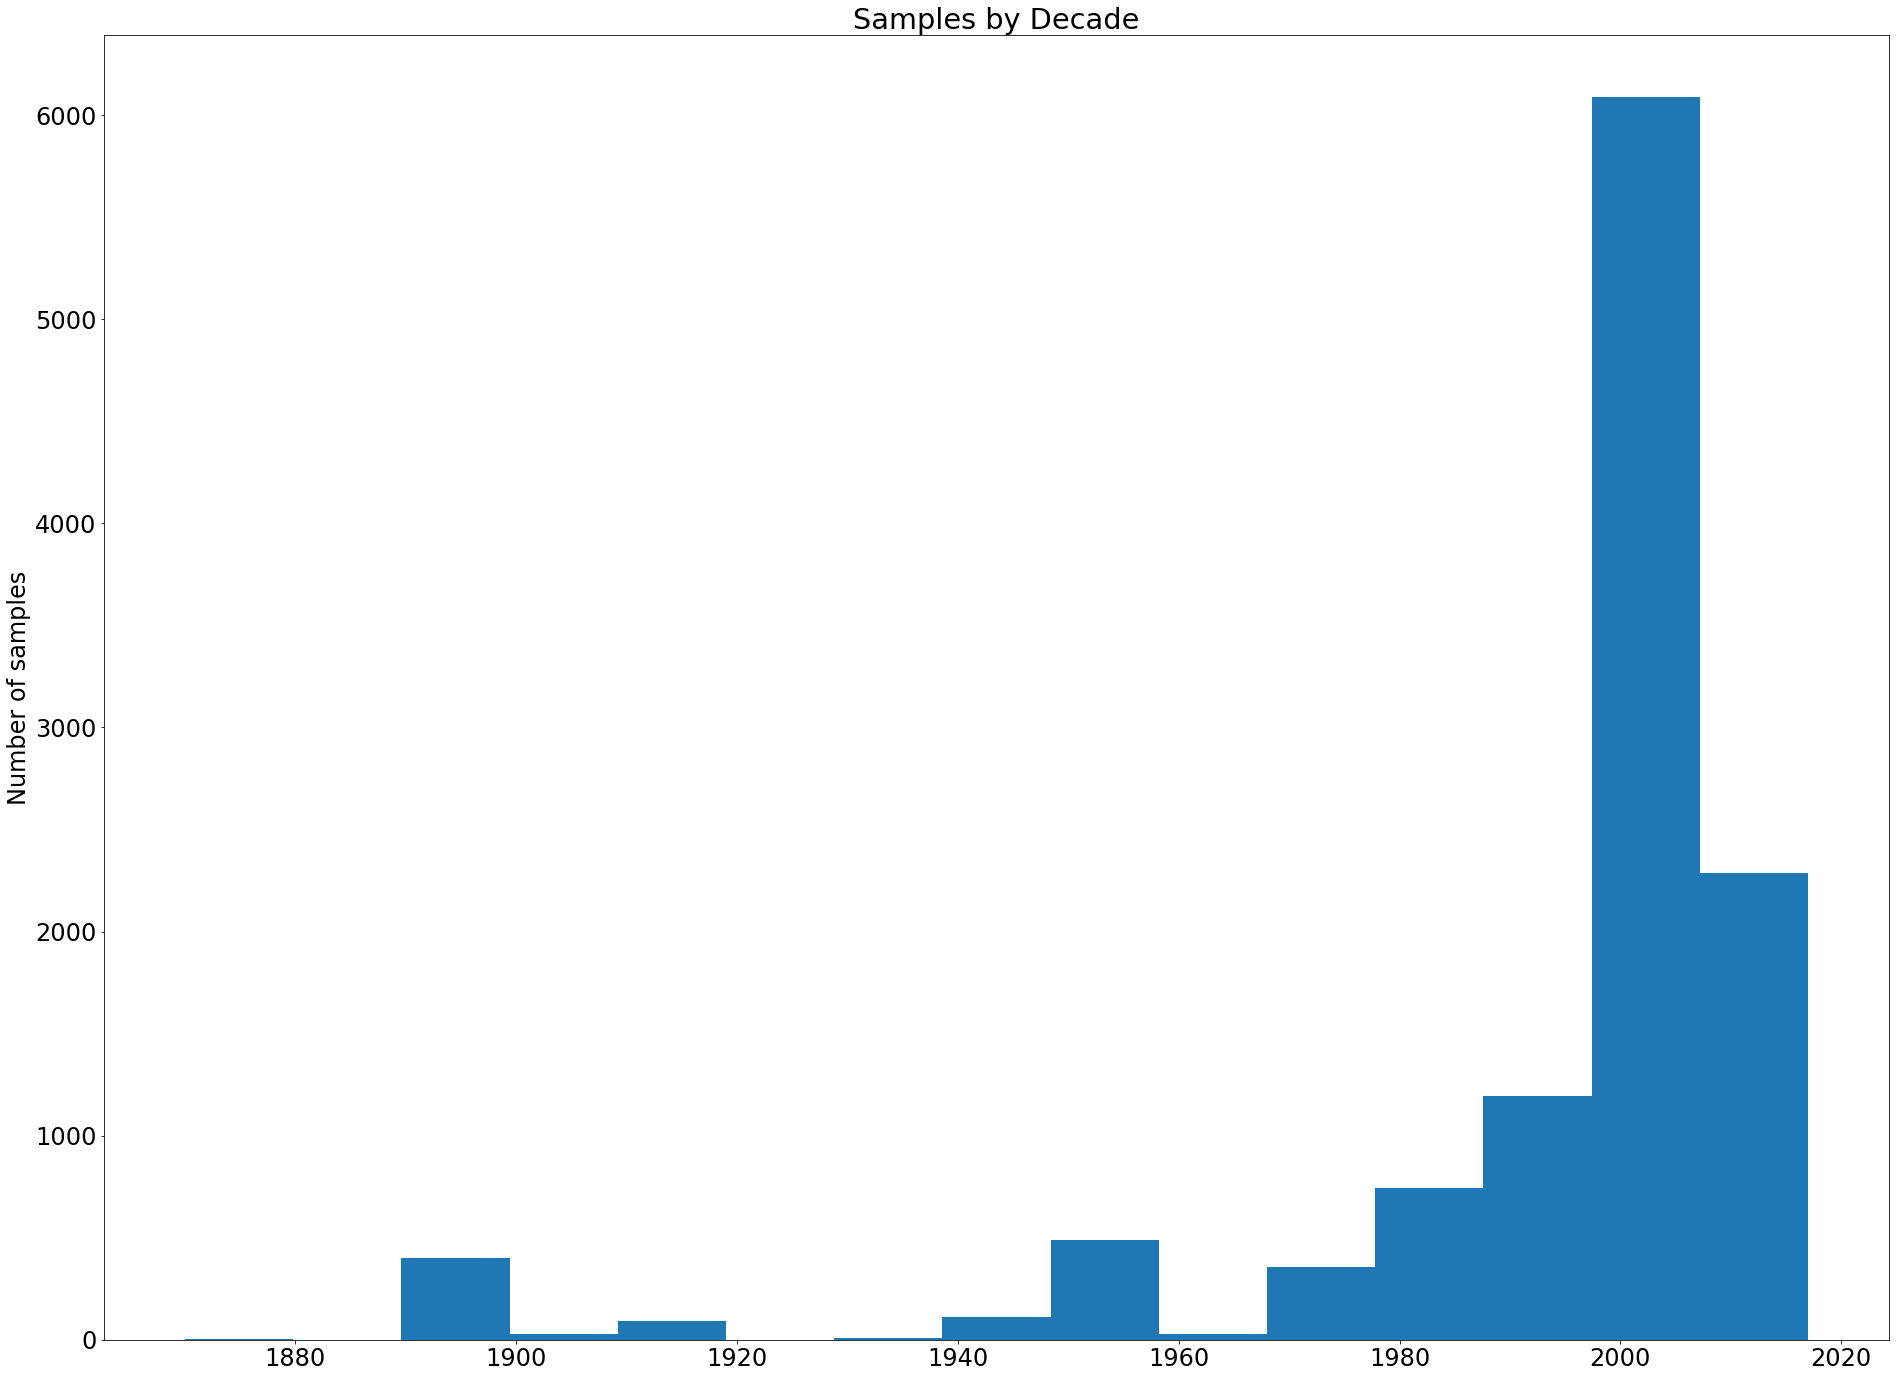

In [5]:
byYearAgg = sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])
byYearAgg = list(map(lambda x: [int(x[0])] * x[1], filter(lambda x: x[0] != '', byYear)))
flatList = [item for sublist in byYearAgg for item in sublist]

plt.hist(flatList, bins=15)
plt.gca().set(title='Samples by Decade', ylabel='Number of samples');

# Diversity by year

In [6]:
totalNumSpecies = len(Counter([i[4] for i in data[1:]]).items())
totalNumSpecies

3188

In [7]:
def getSpeciesAtYear(year):
    return Counter([x[4] for x in data if x[16] == year and x[16] != ''])

def getSpeciesAtAndBeforeYear(year):
    return Counter([x[4] for x in data if x[16]<=year and x[16] != ''])

### Species discovered up to a year

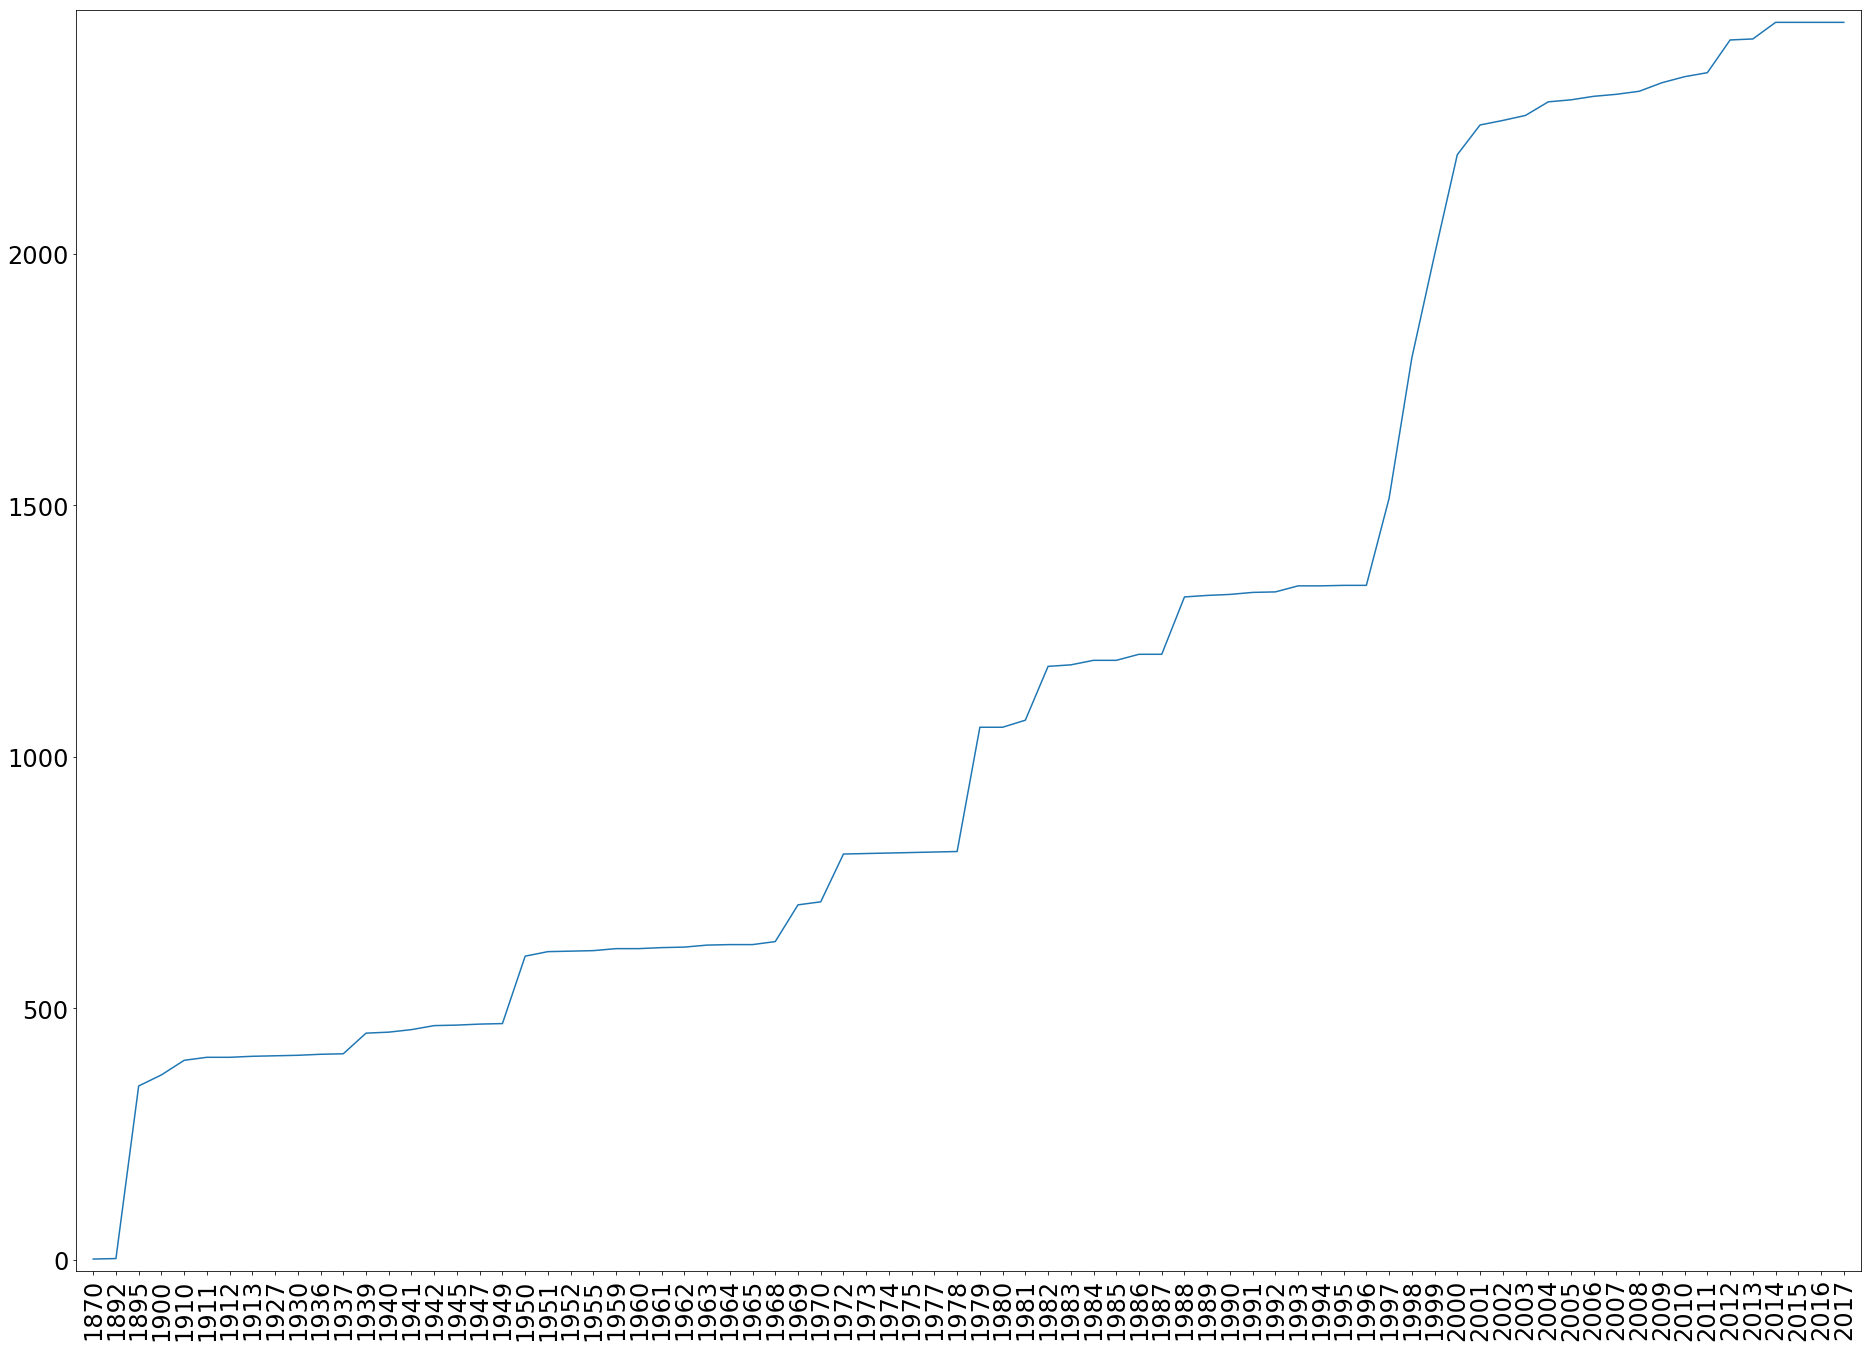

In [8]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numSpecies = list(map(lambda x: len(getSpeciesAtAndBeforeYear(x)), years))

plt.plot(years, numSpecies)
plt.xticks(years, rotation='vertical')
plt.margins(0.01)
plt.subplots_adjust(bottom=0.15)
plt.show()

### Number of unique species recorded by year

#### (May have been previously discovered)

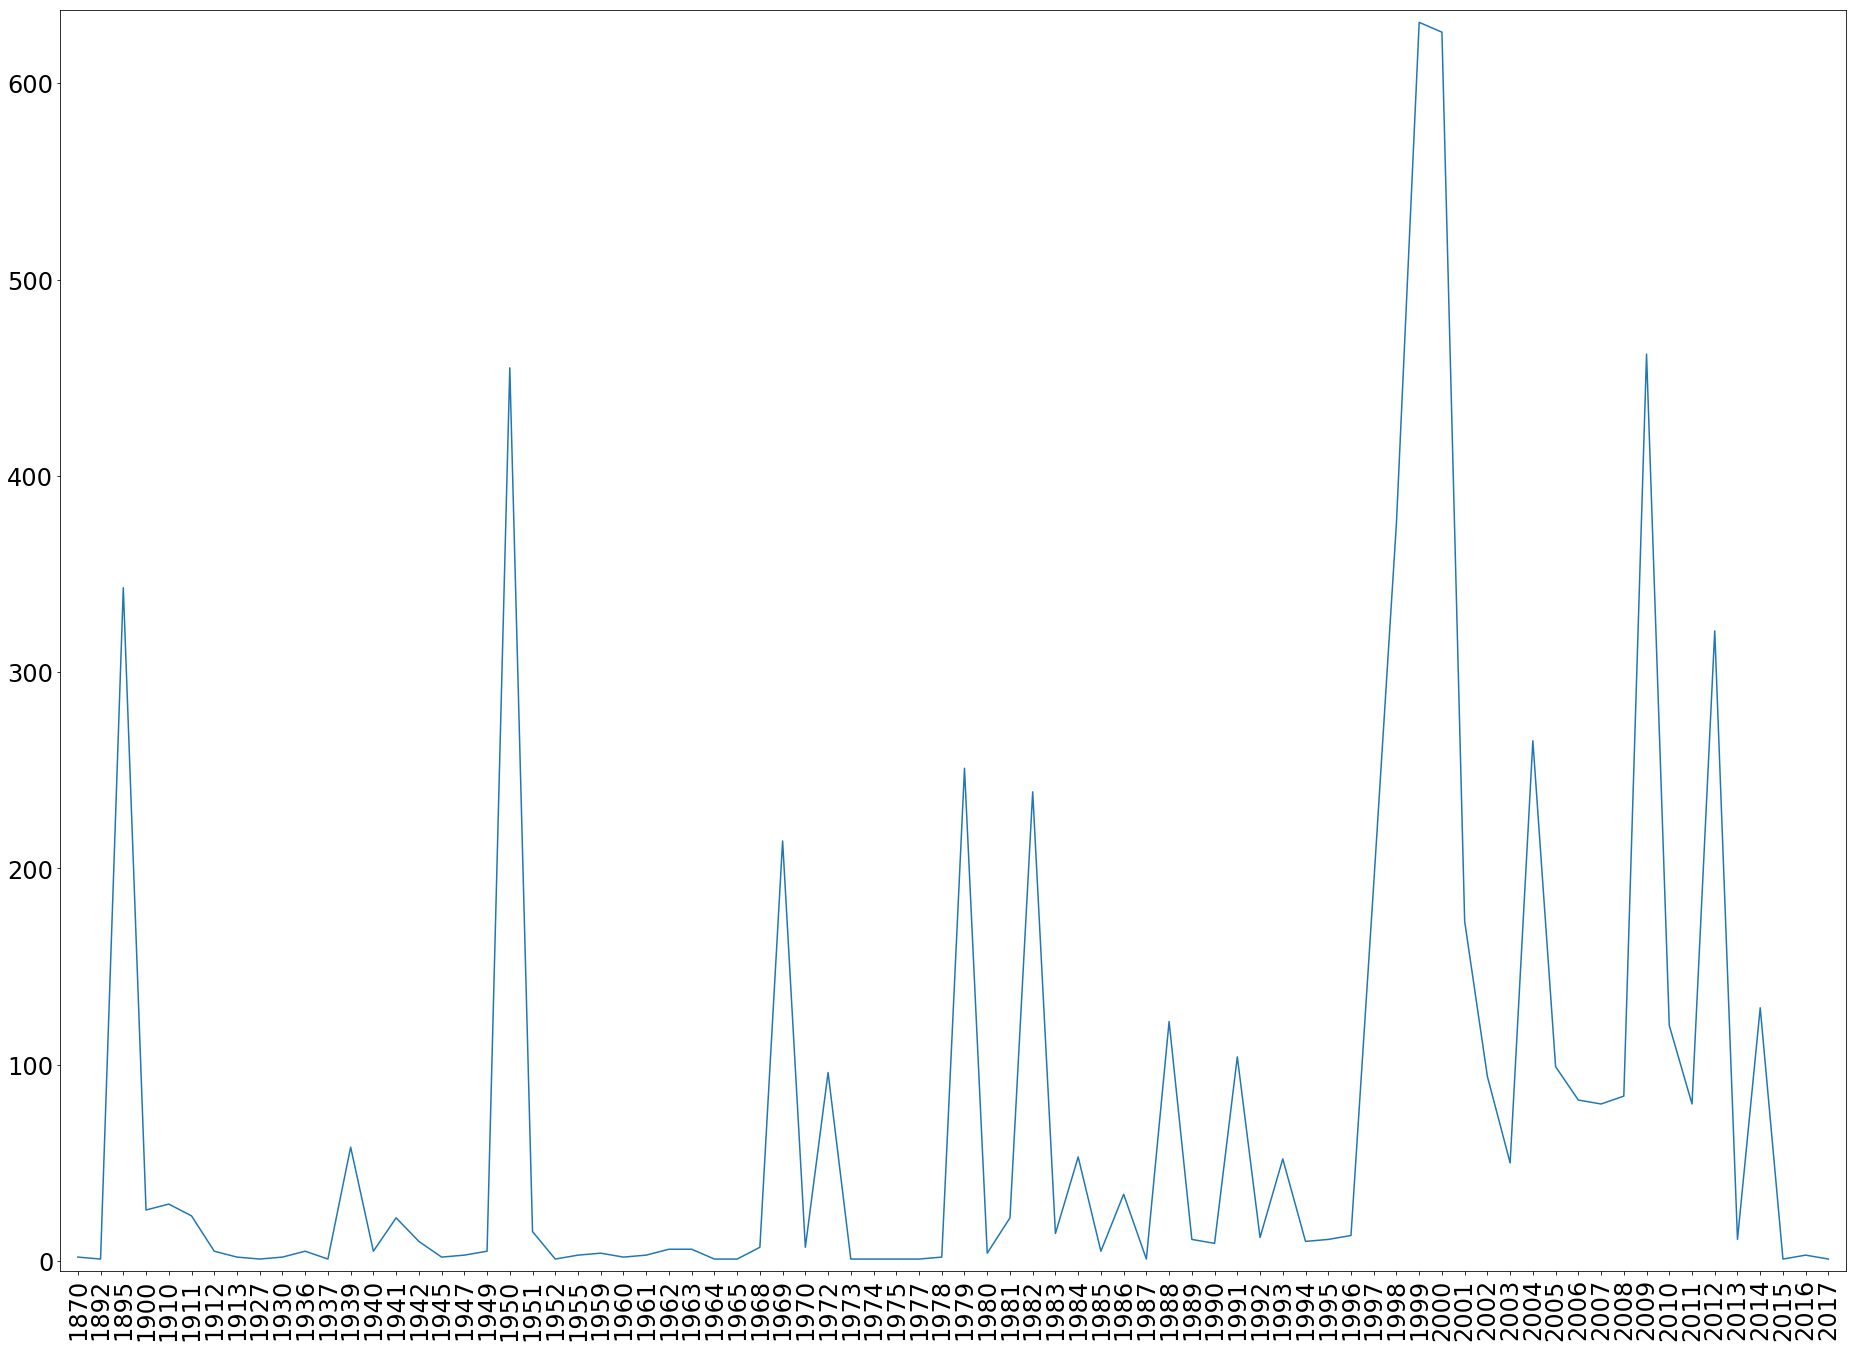

In [9]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numSpecies = list(map(lambda x: len(getSpeciesAtYear(x)), years))

plt.plot(years, numSpecies)
plt.xticks(years, rotation='vertical')
plt.margins(0.01)
plt.subplots_adjust(bottom=0.15)
plt.show()

# Number of observers (contributors) per year

### NOTE: we are removing any entries that belong to 'unknown' and that are not 'HumanObservation' (makes almost no difference for this second criteria)

### Interesting Observation: huge number of records in later years that are unknown collectors- play with the query function to see

In [10]:
recorders = [x[23] for x in data]
determiners = [x[24] for x in data]

recs = Counter(recorders)
dets = Counter(determiners)

print("Total number of recorders in time: " + str(len(recs.items())))
print("Total number of determiners in time: " + str(len(dets.items())))
print("Records with no recorders : " + str(recs['Unknown']))
print("Records with no determiners : " + str(dets['Unknown']))

obsTypes = [x[34] for x in data]
print(Counter(obsTypes))

Total number of recorders in time: 443
Total number of determiners in time: 246
Records with no recorders : 69
Records with no determiners : 7
Counter({'HumanObservation': 37378, 'PreservedSpecimen': 10, 'Basis of record': 1})


# 'SQL Query' 

In [11]:
def observersByYear(year):
    usingIndex = 23
    return Counter([x[usingIndex] for x in data if 
                        x[16] == year and x[16] != '' and 
                        x[34] == 'HumanObservation'  and 
                        (x[usingIndex]).lower() != 'unknown' and
                        x[usingIndex] != ''
                   ])

def observersByYearUnfiltered(year):
    usingIndex = 23
    return Counter([x[usingIndex] for x in data if 
                        x[16] == year 
                   ])

### (Unfiltered) number of observers per year

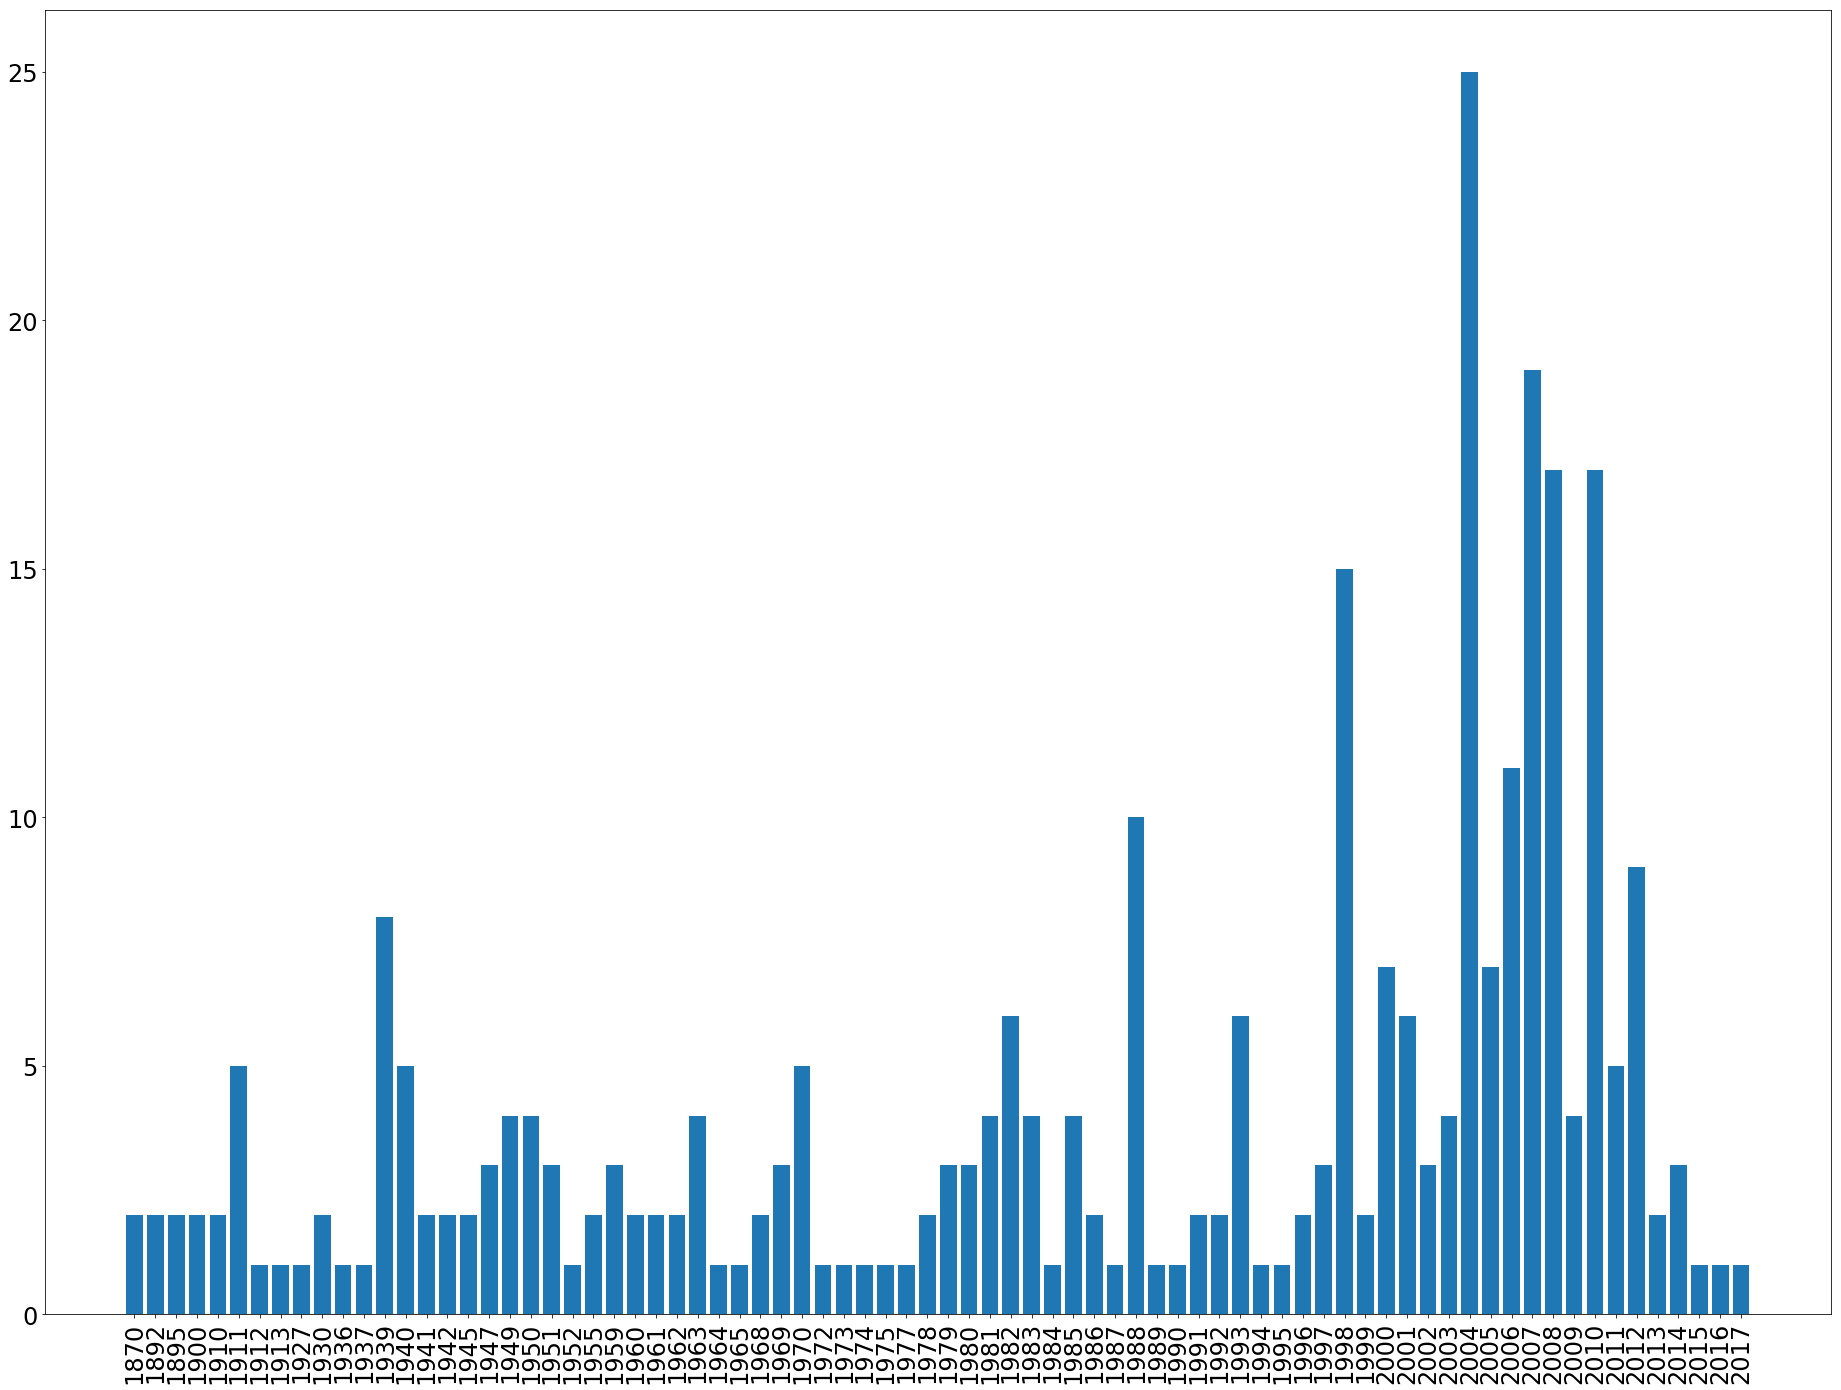

In [12]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numObserversByYear = list(map(lambda x: len(observersByYearUnfiltered(x).items()), years))

plt.bar(years, numObserversByYear)
plt.xticks(years, rotation='vertical')
plt.show()

### Addition of filter to known, human observers

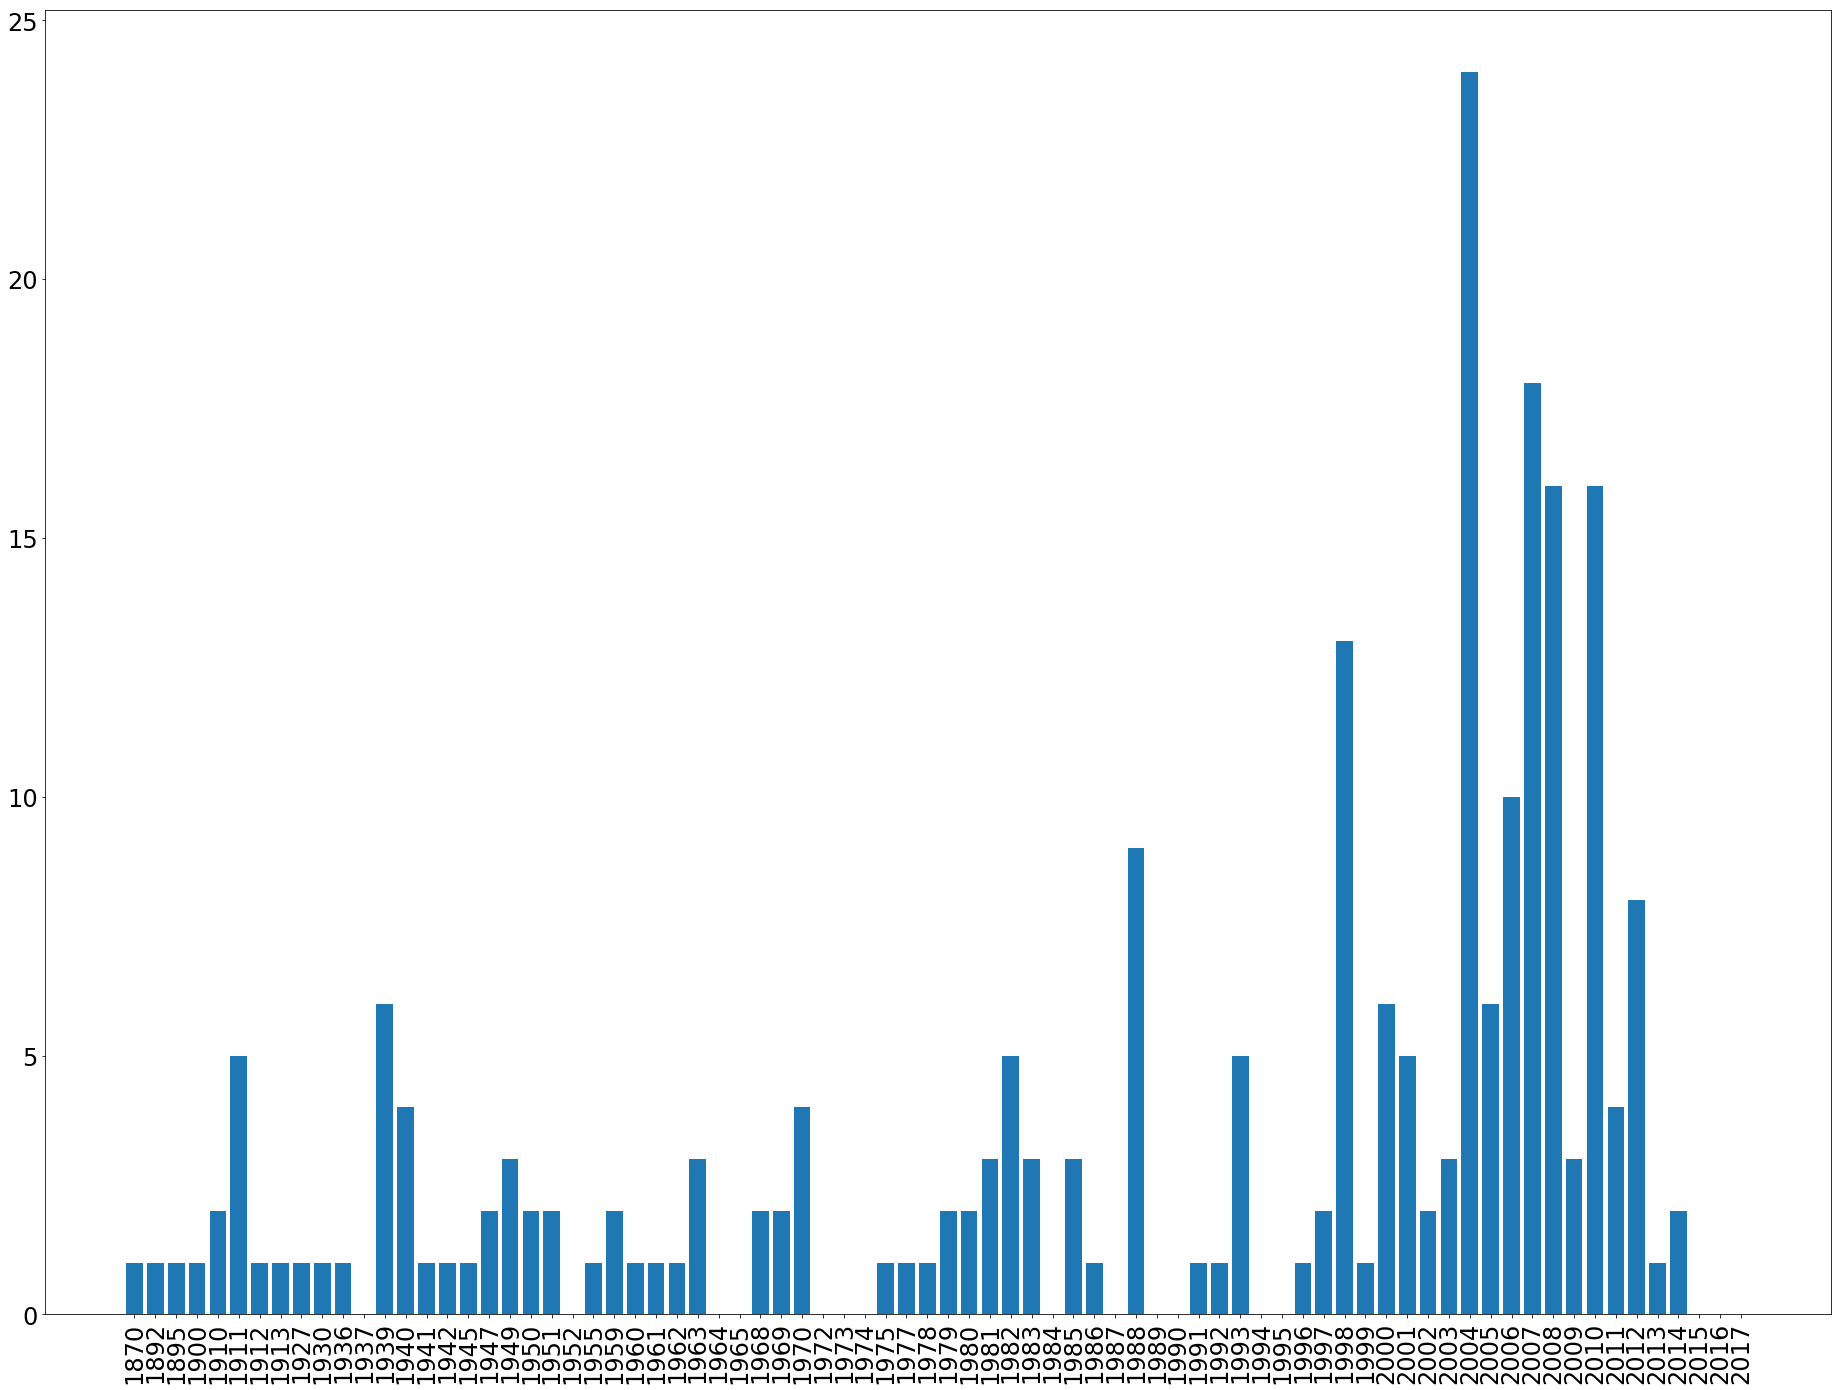

In [13]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numObserversByYear = list(map(lambda x: len(observersByYear(x).items()), years))

plt.bar(years, numObserversByYear)
plt.xticks(years, rotation='vertical')
plt.show()

### Normalised => Observations / Number of observers

In [14]:
def normalisedByObservers(year):
    entriesForYear = observersByYear(year)
    numEntries = sum(entriesForYear.values())
    numObservers = len(entriesForYear.items())
    if numObservers > 0:
        return numEntries / numObservers
    else:
        return 0
    
def normalisedByObserversUnfiltered(year):
    entriesForYear = observersByYearUnfiltered(year)
    numEntries = sum(entriesForYear.values())
    numObservers = len(entriesForYear.items())
    if numObservers > 0:
        return numEntries / numObservers
    else:
        return 0
print(normalisedByObservers('1870'))

1.0


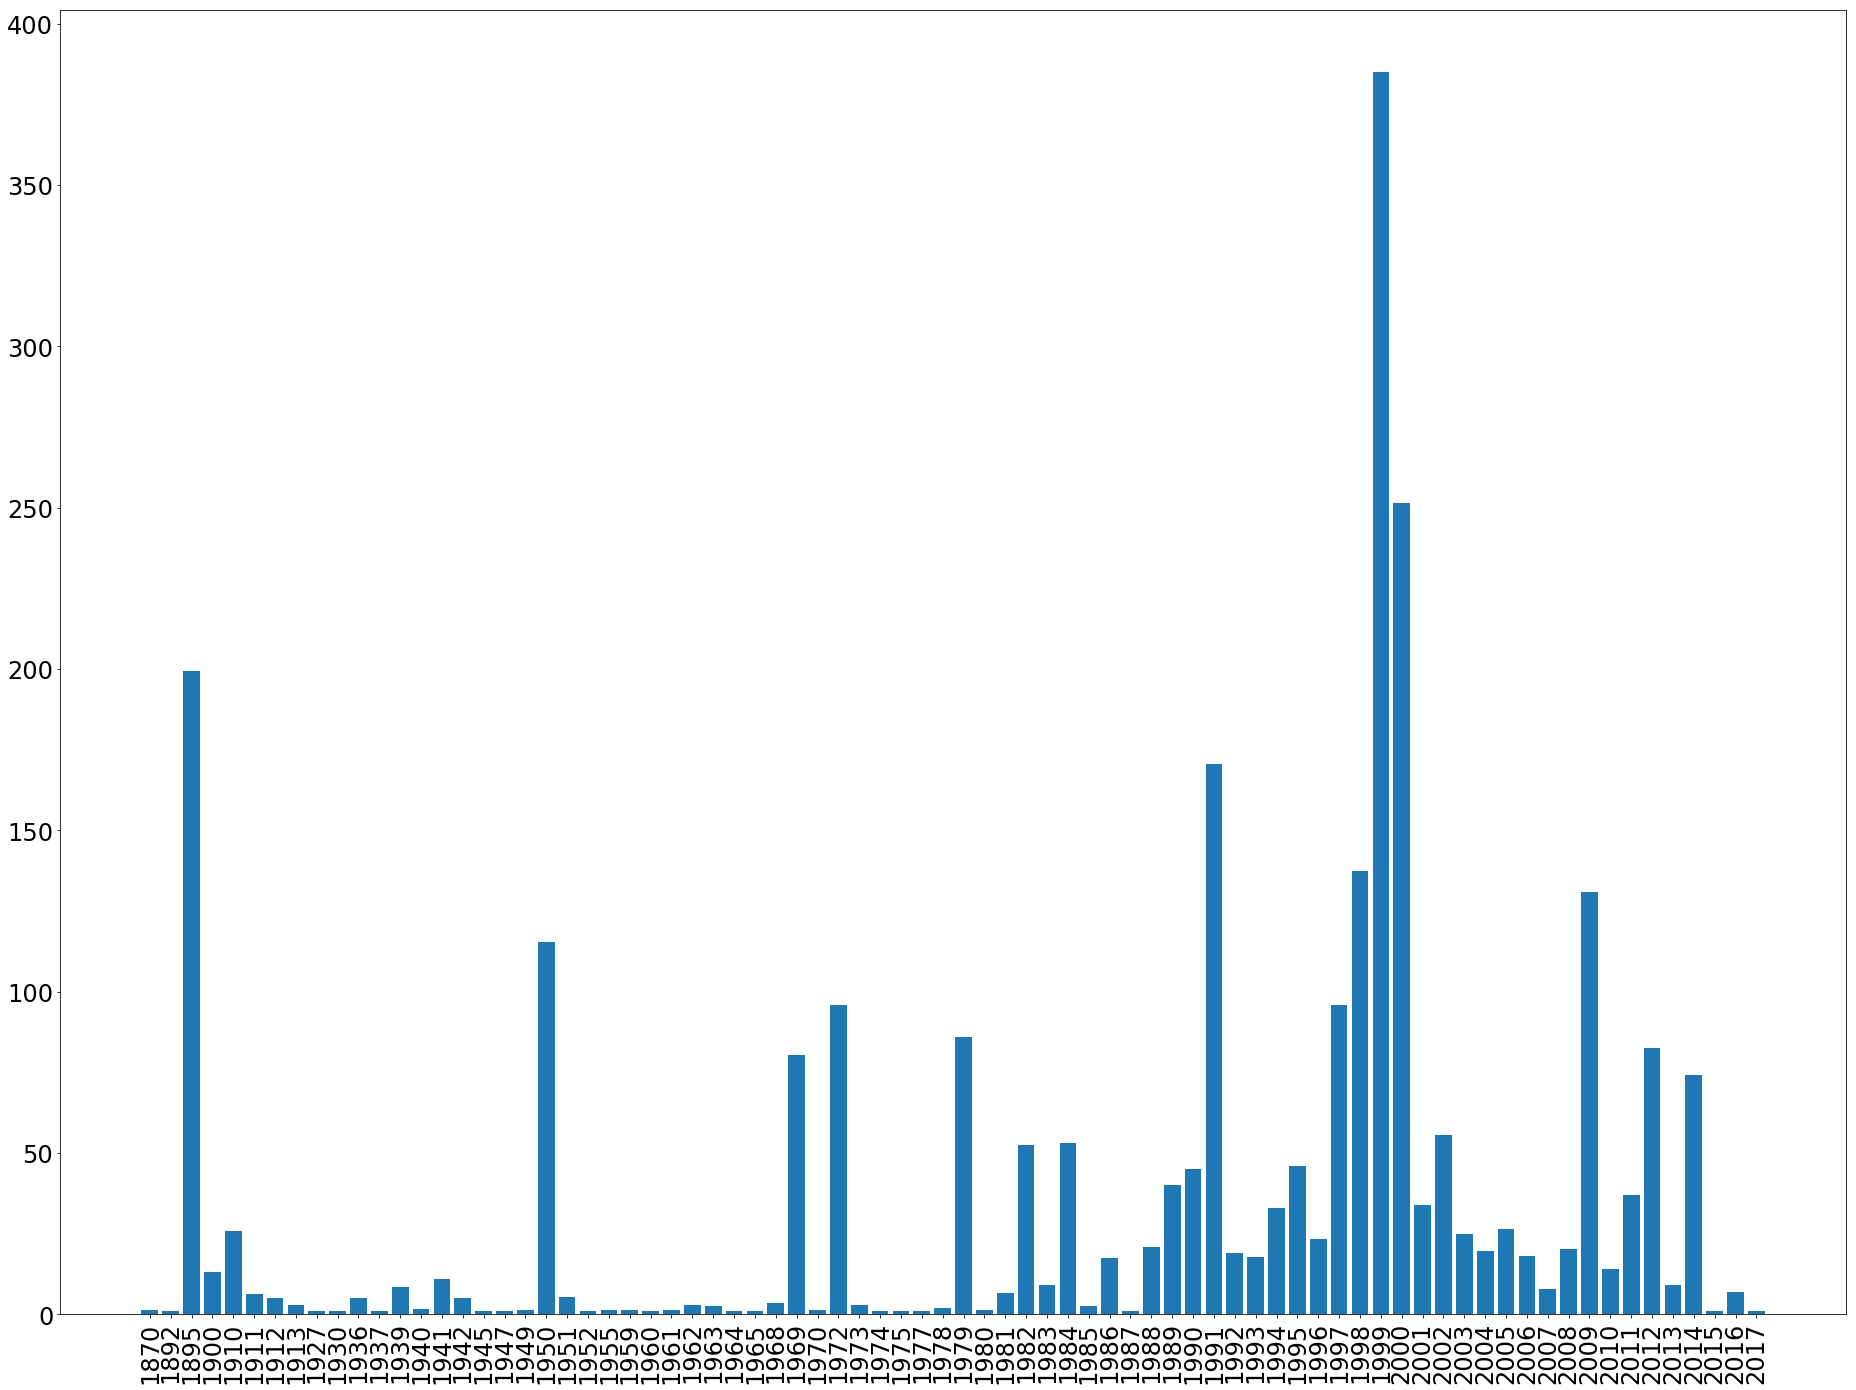

In [15]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numObserversByYear = list(map(lambda x: normalisedByObserversUnfiltered(x), years))

plt.bar(years, numObserversByYear)
plt.xticks(years, rotation='vertical')
plt.show()

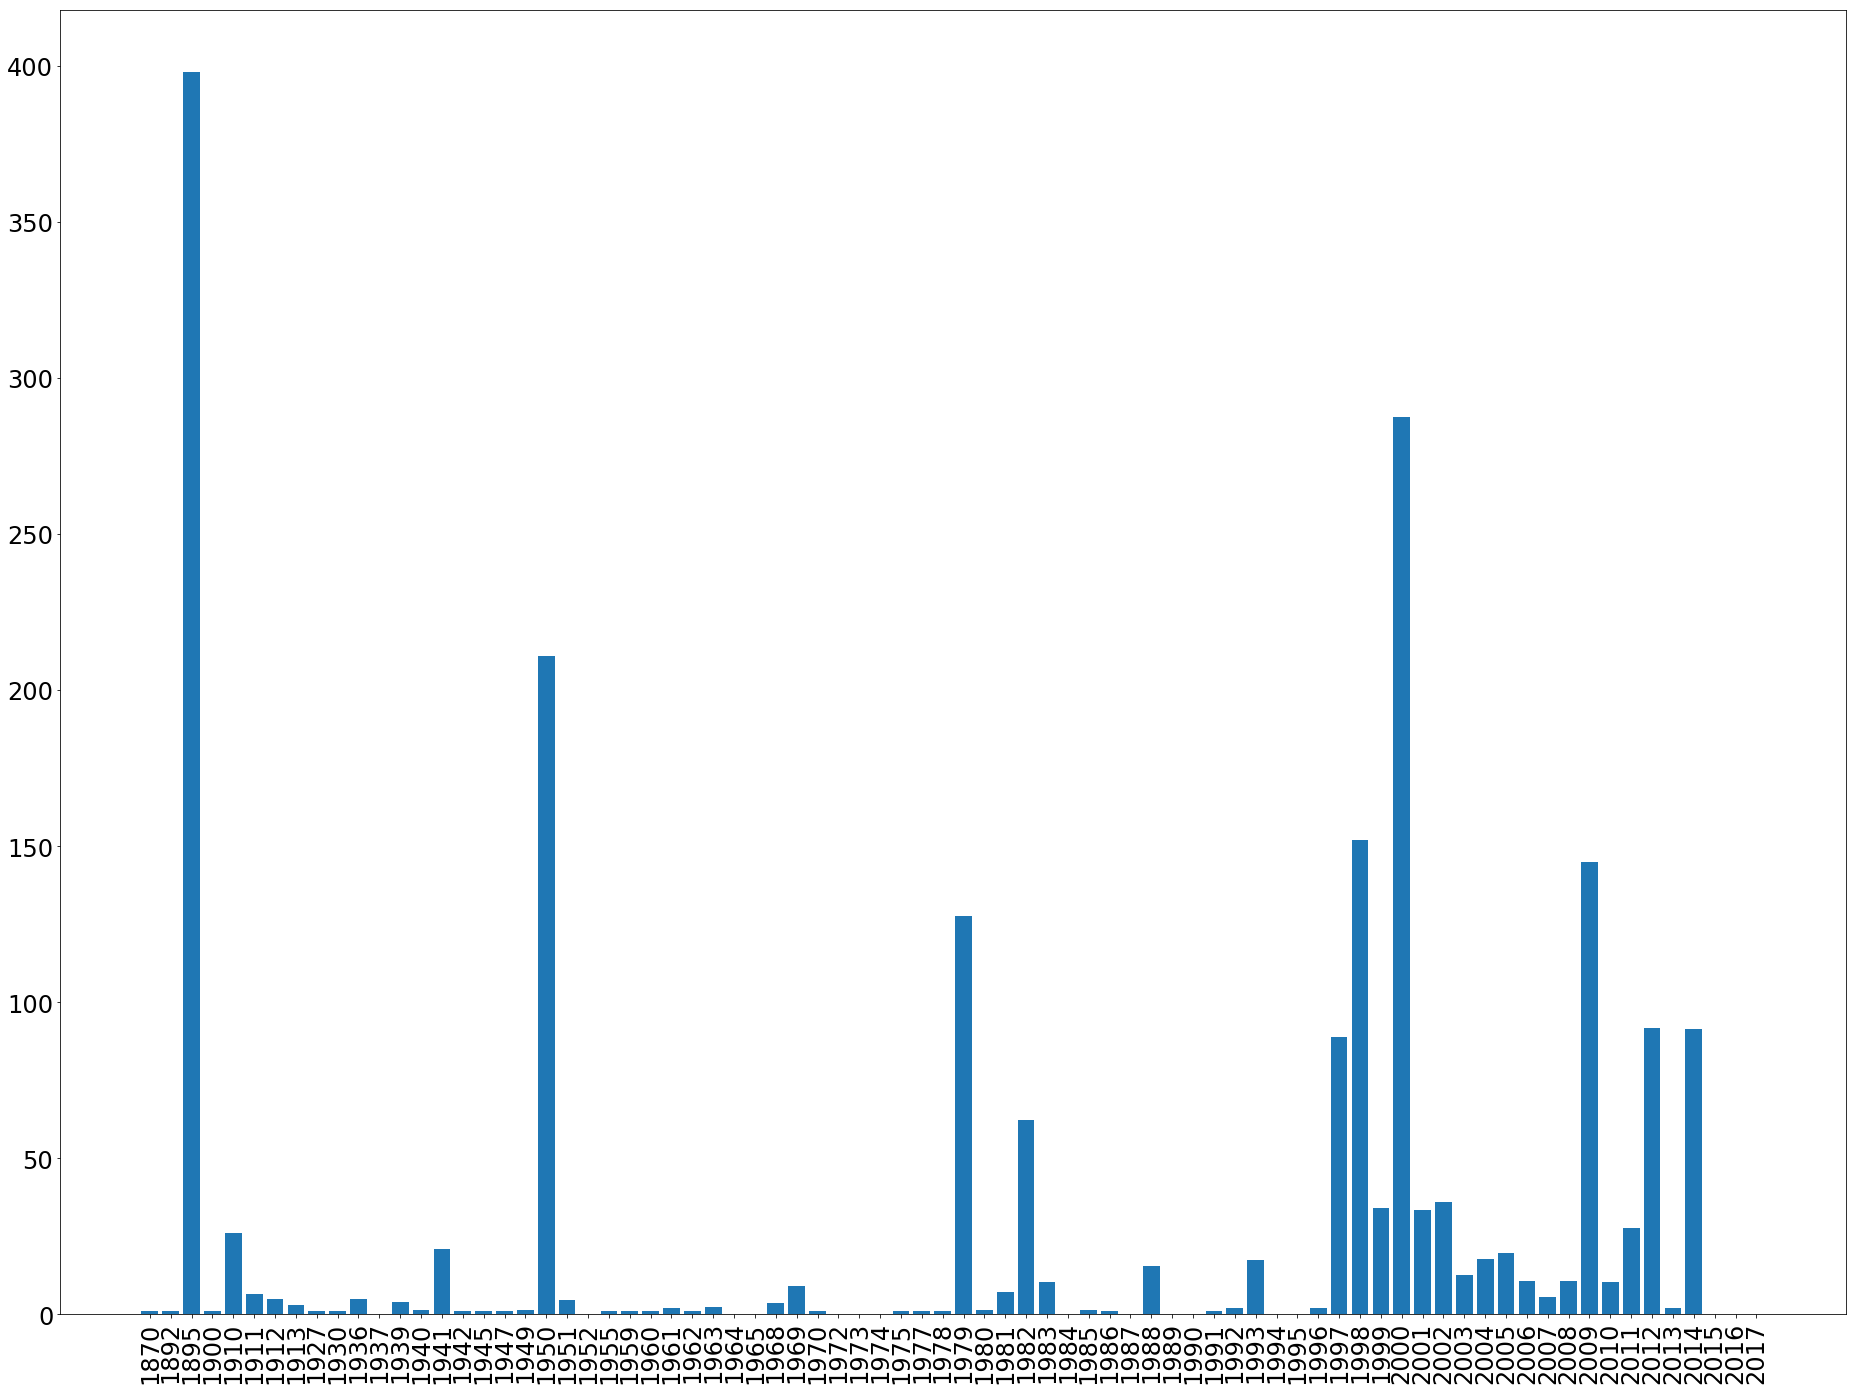

In [16]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numObserversByYear = list(map(lambda x: normalisedByObservers(x), years))

plt.bar(years, numObserversByYear)
plt.xticks(years, rotation='vertical')
plt.show()

### Histogram Diff

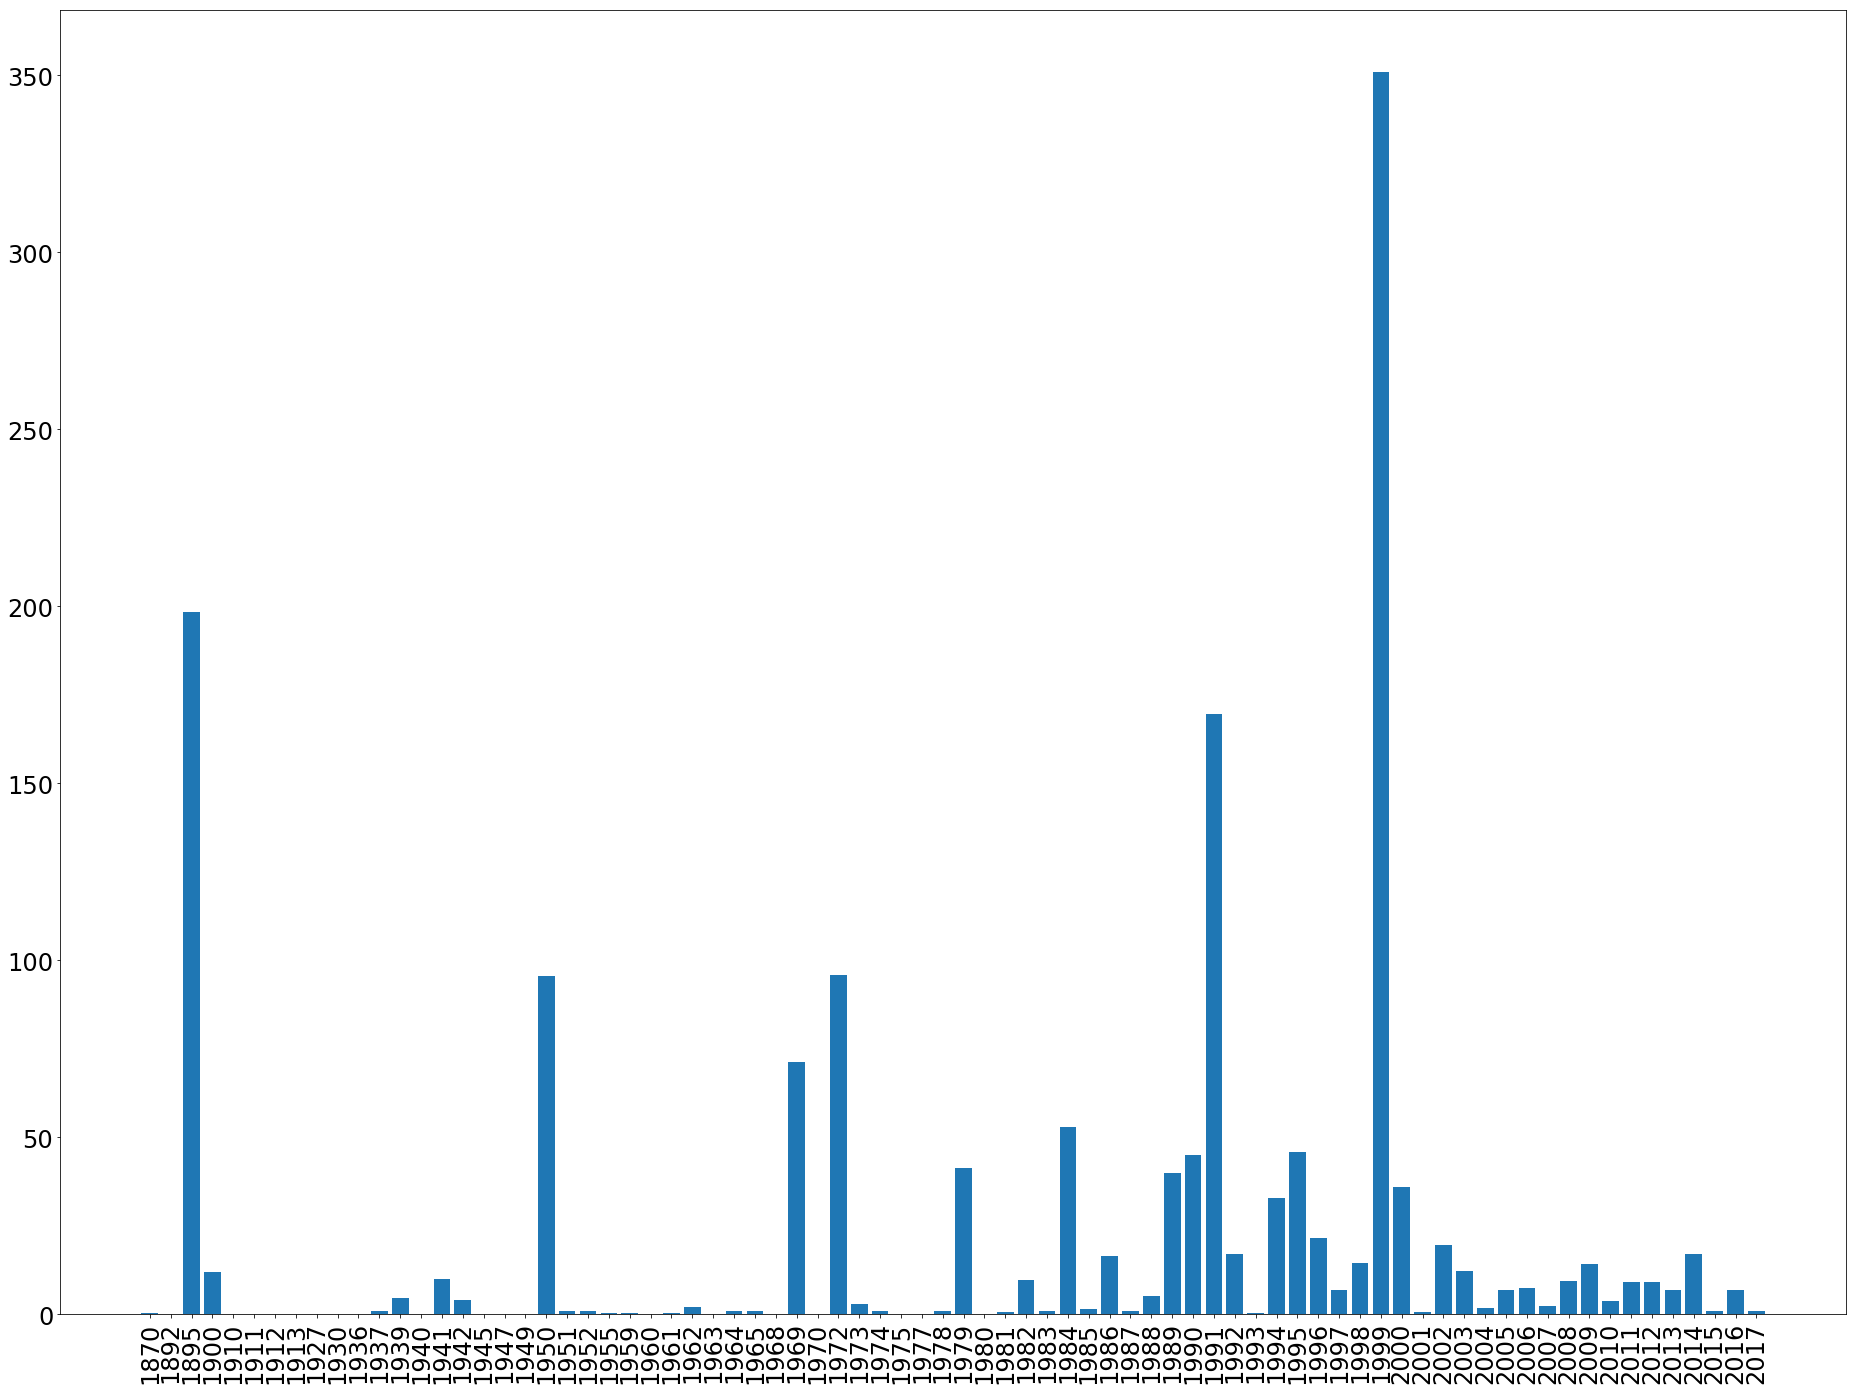

In [17]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
numObserversByYear = list(map(lambda x: normalisedByObserversUnfiltered(x), years))
numObserversByYearFiltered = list(map(lambda x: normalisedByObservers(x), years))

diff = [abs(y - x) for x,y in zip(numObserversByYearFiltered, numObserversByYear)]

plt.bar(years, diff)
plt.xticks(years, rotation='vertical')
plt.show()

# Avg observations per person w/ variability

In [33]:
def averageObservationsPerPerson(year):
    obs = observersByYear(year)
    return obs.values()

In [42]:
years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]
observerDictAtYear = list(map(lambda x: observersByYear(x), years))

print([len(observerDictAtYear[i].items()) for i in range(1,60)])

[1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 0, 6, 4, 1, 1, 1, 2, 3, 2, 2, 0, 1, 2, 1, 1, 1, 3, 0, 0, 2, 2, 4, 0, 0, 0, 1, 1, 1, 2, 2, 3, 5, 3, 0, 3, 1, 0, 9, 0, 0, 1, 1, 5, 0, 0, 1, 2, 13, 1]


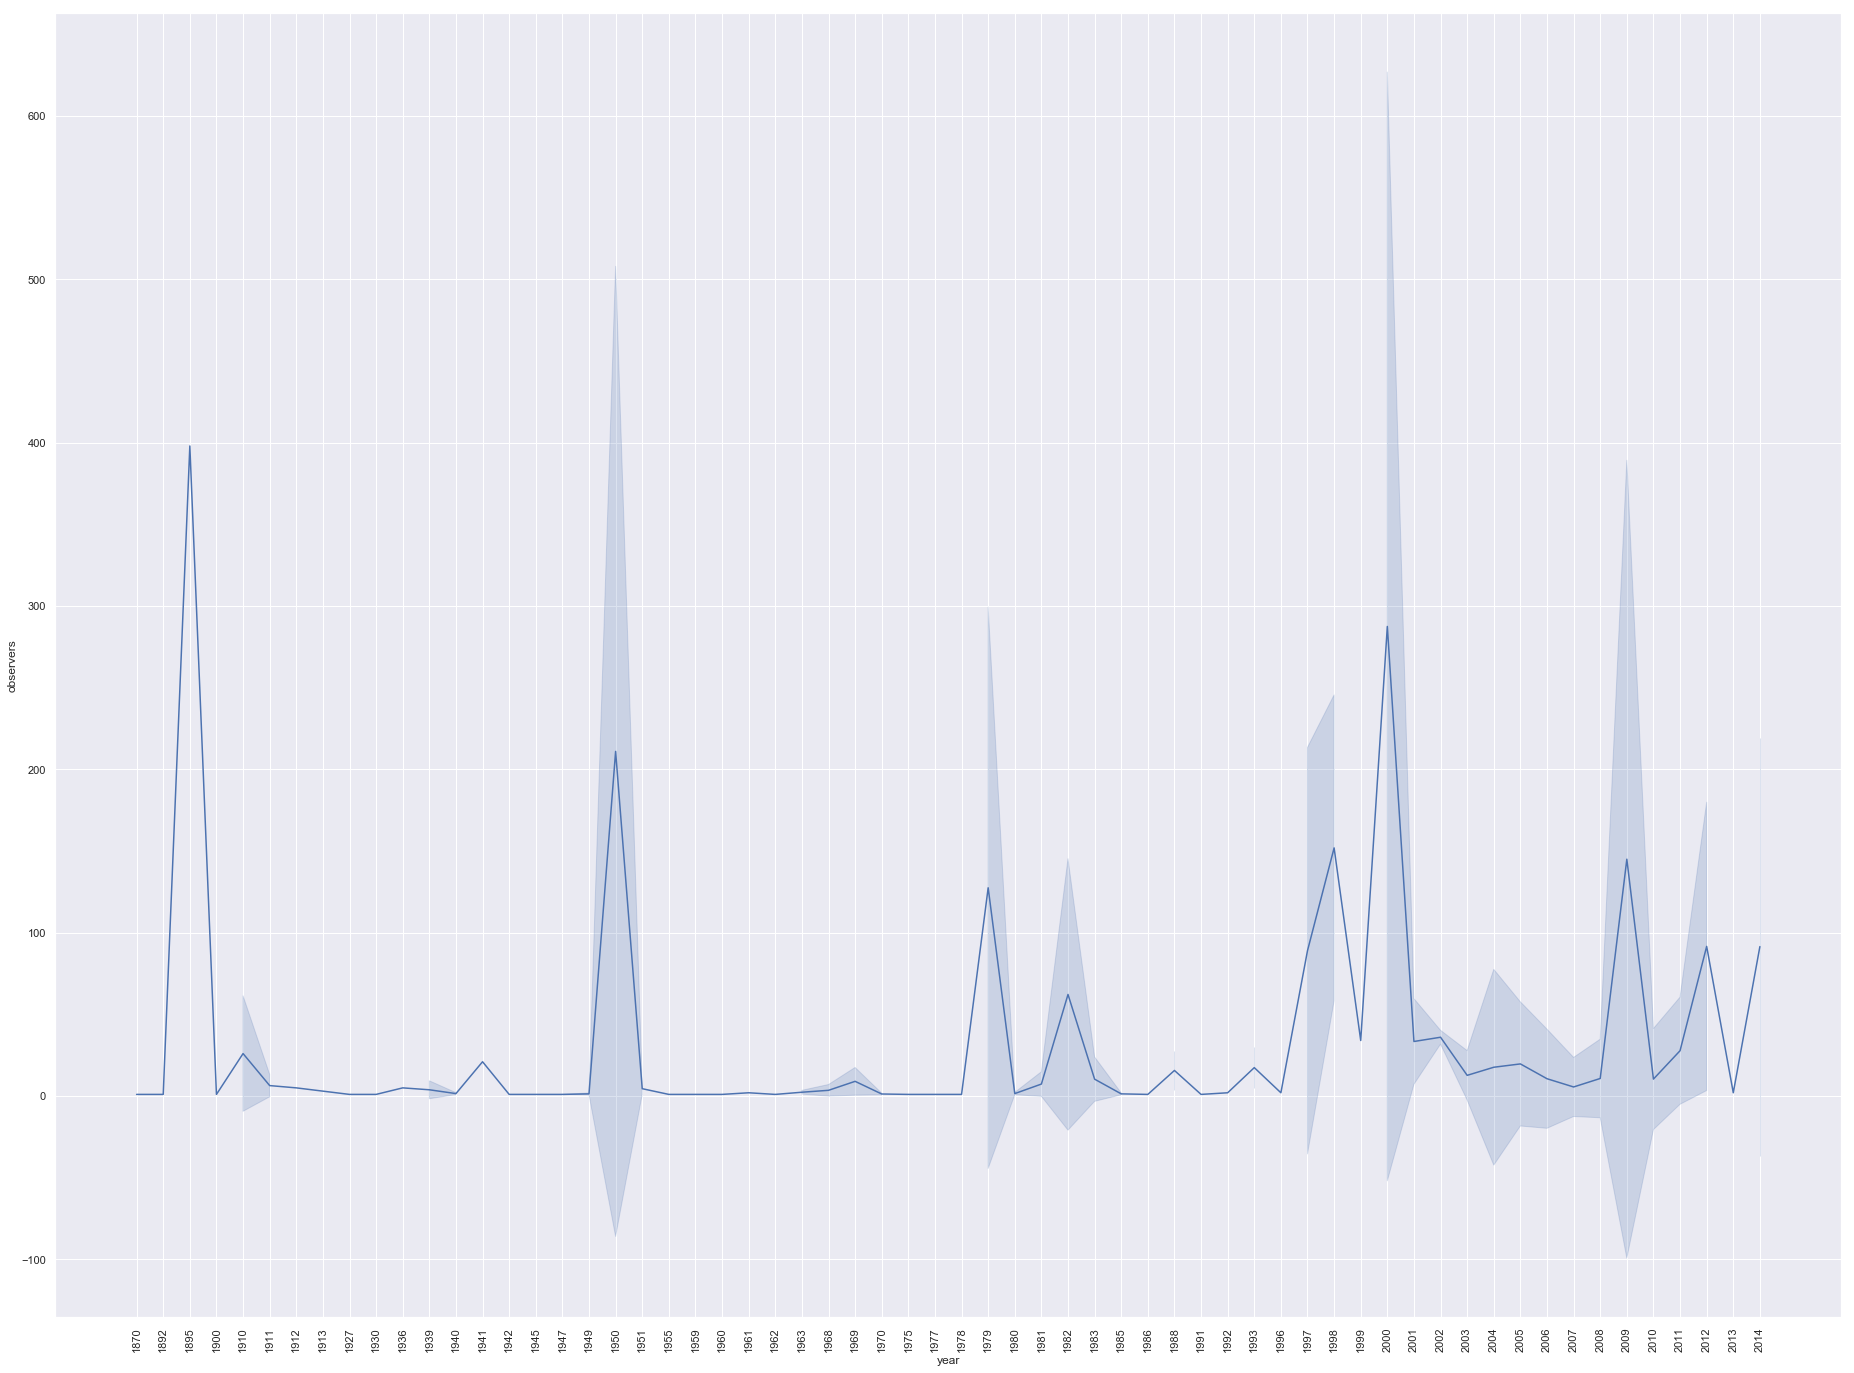

In [51]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

years = [x[0] for x in sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])[1:]]

xs = []
ys = []
for y in years:
    vals = averageObservationsPerPerson(y)
    for v in vals:
        xs.append(y)
        ys.append(v)

d = {'year': xs, 'observers': ys}
pdsfm = pd.DataFrame(d)
plt.xticks(rotation=90)
ax = sns.lineplot(x='year', y='observers', data=pdsfm, ci="sd")